In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.plotly as py 
import matplotlib.dates as mdates 
from mpl_finance import candlestick_ohlc

Apple       9420
Amazon      5268
Google      3442
Facebook    1490
Name: Stock, dtype: int64


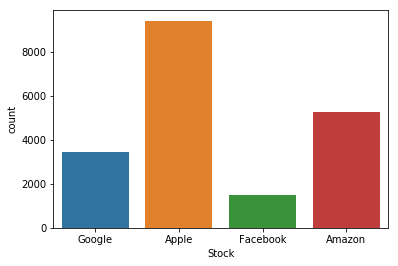

In [2]:
df=pd.read_csv("GAFA Stock Prices.csv")

#Count of value for each stock
print(df['Stock'].value_counts())
sns.countplot(df['Stock'])
plt.show()

In [3]:
#Separate csv files for each stock
df[df['Stock']=='Google'].to_csv("GAFA-Google.csv")
df[df['Stock']=='Apple'].to_csv("GAFA-Apple.csv")
df[df['Stock']=='Facebook'].to_csv("GAFA-Facebook.csv")
df[df['Stock']=='Amazon'].to_csv("GAFA-Amazon.csv")

s1=pd.read_csv("GAFA-Google.csv")
s2=pd.read_csv("GAFA-Apple.csv")
s3=pd.read_csv("GAFA-Facebook.csv")
s4=pd.read_csv("GAFA-Amazon.csv")

#Start Date: 5 May 2012
#Making the start date equal for each stock
def split(s):
    l=[]
    for i,data in s.Date.iteritems():
        y=data.split('/')
        if(int(y[2])<2012):
            l.append(i)
        elif((int(y[2])==2012) & (int(y[1])<5)):
            l.append(i)
        elif((int(y[2])==2012) & (int(y[1])==5) & (int(y[0])<18)):
            l.append(i)
    s.drop(s.index[:(l[-1]+1)], inplace=True)
split(s1)
split(s2)
split(s4)

s1.to_csv("GAFA-Google.csv")
s2.to_csv("GAFA-Apple.csv")
s3.to_csv("GAFA-Facebook.csv")
s4.to_csv("GAFA-Amazon.csv")

Facebook    1490
Amazon      1490
Apple       1490
Google      1490
Name: Stock, dtype: int64


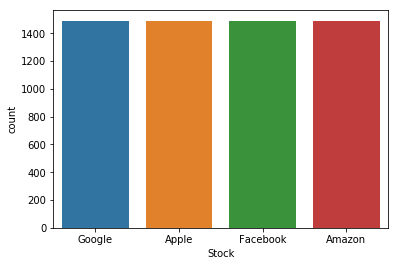

In [4]:
#Concatenate to show that each stock now has equal values
df1=pd.concat([s1,s2,s3,s4])

print(df1['Stock'].value_counts())
sns.countplot(df1['Stock'])
plt.show()

In [5]:
df=pd.read_csv("GAFA Stock Prices.csv")

#Convert 'Date' column to datetime type
df.Date=pd.to_datetime(df.Date)
print(df.Date.dtypes)

datetime64[ns]


In [6]:
s1=pd.read_csv("GAFA-Google.csv")
s2=pd.read_csv("GAFA-Apple.csv")
s3=pd.read_csv("GAFA-Facebook.csv")
s4=pd.read_csv("GAFA-Amazon.csv")

#Drop the unnecessary columns
#Make new columns named "Year", "Month" and "Date" for each dataset
#Convert the 'Date' column to datetime type for each dataset
def drop(s):
    s.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
    s.Date=pd.to_datetime(s.Date)
    s["Day"]=[date.day for date in s.Date]
    s["Month"]=[date.month for date in s.Date]
    s["Year"]=[date.year for date in s.Date]

drop(s1)
drop(s2)
drop(s3)
drop(s4)

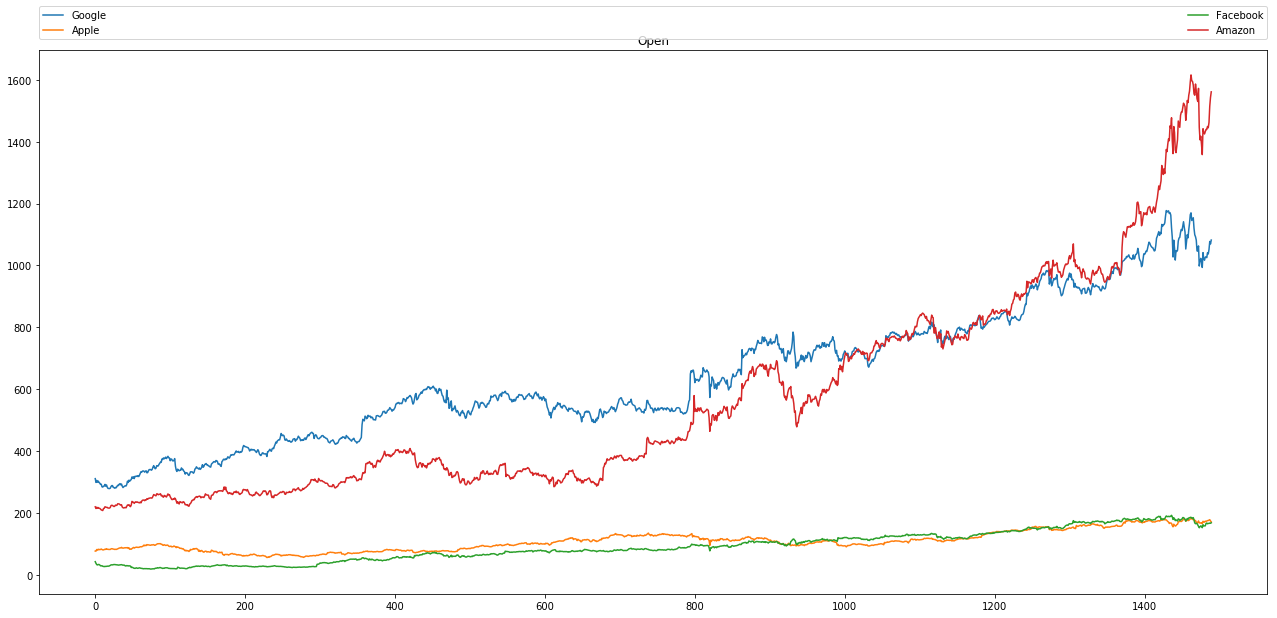

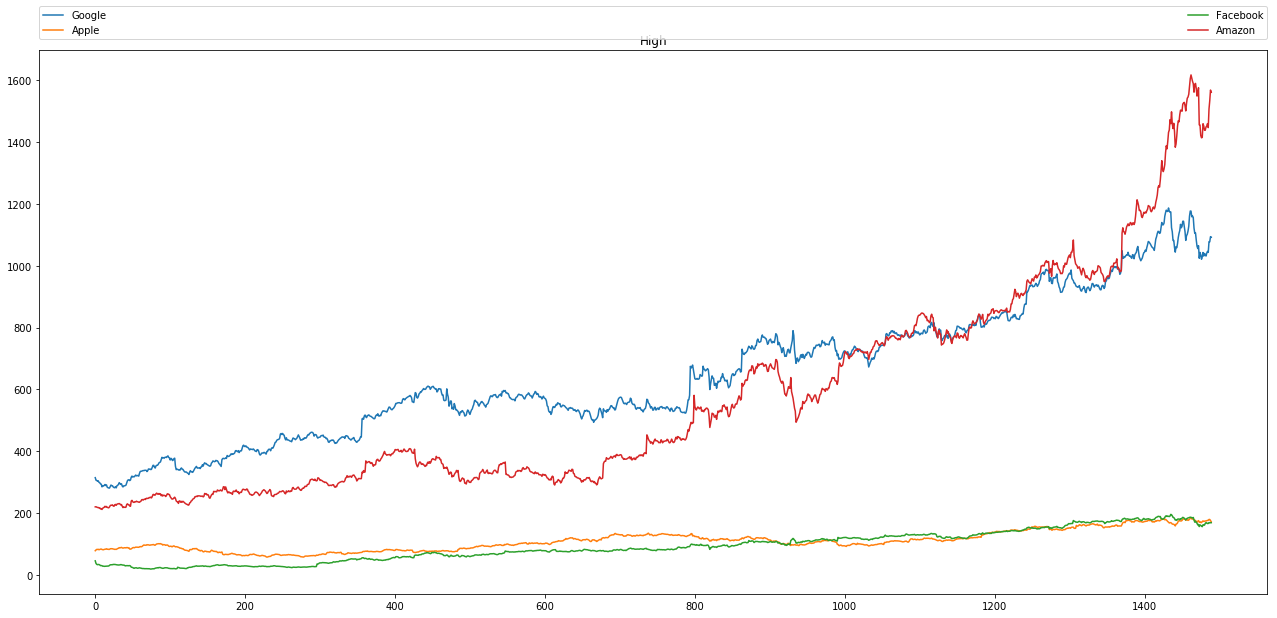

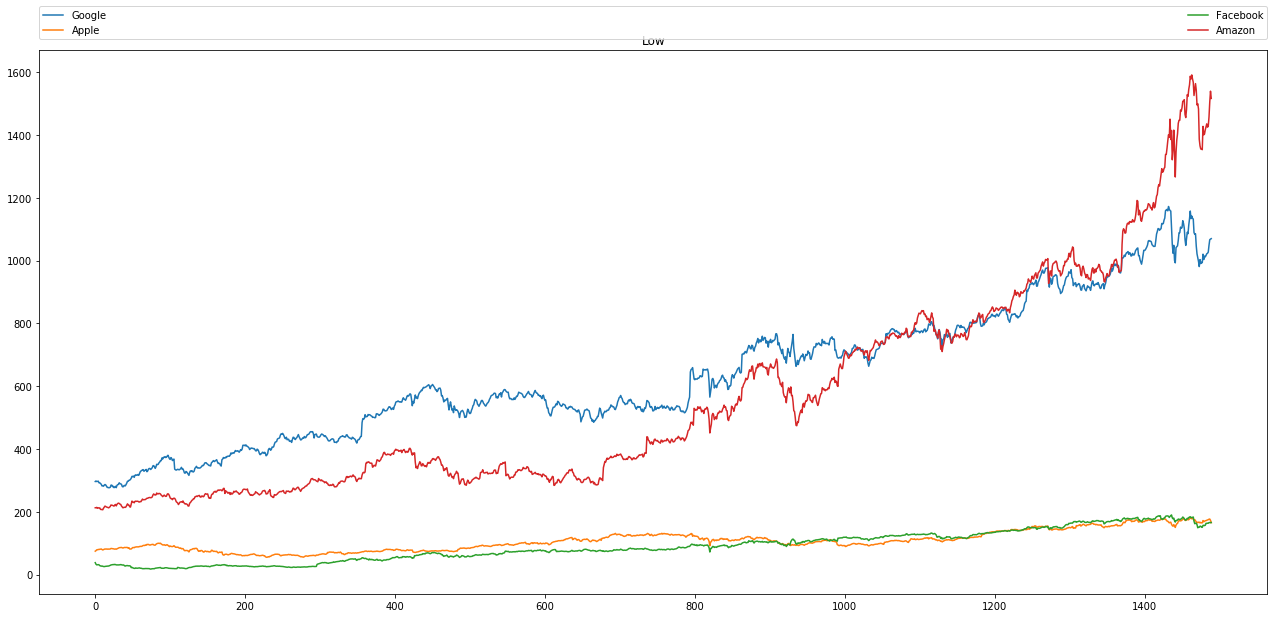

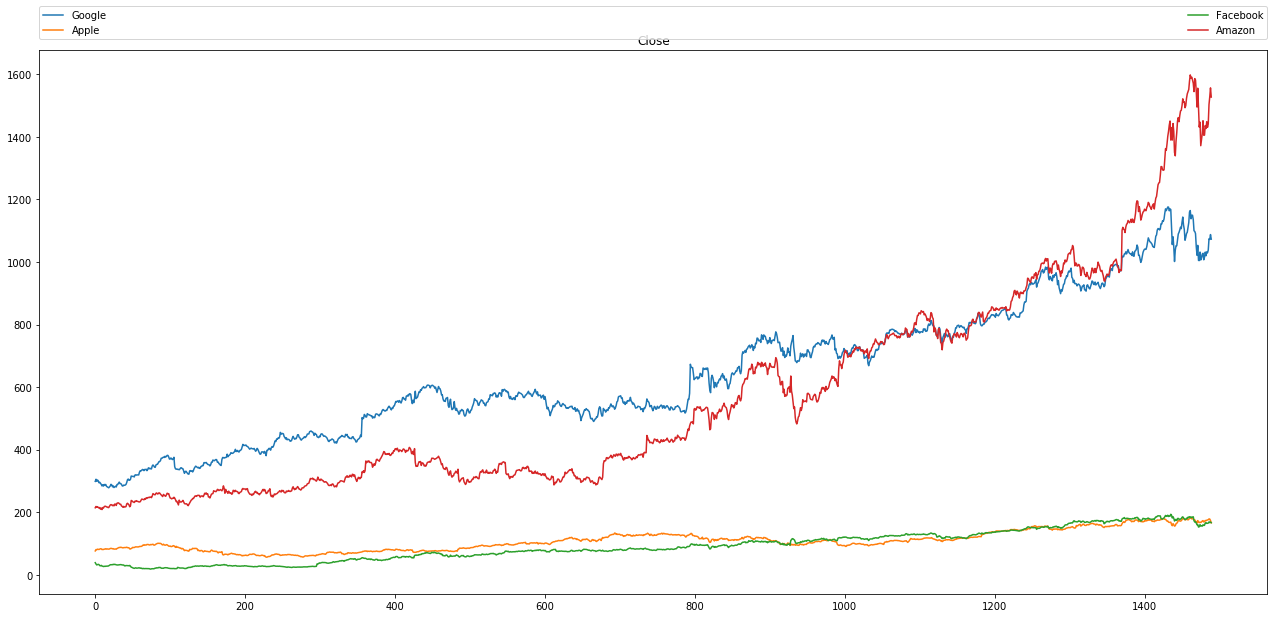

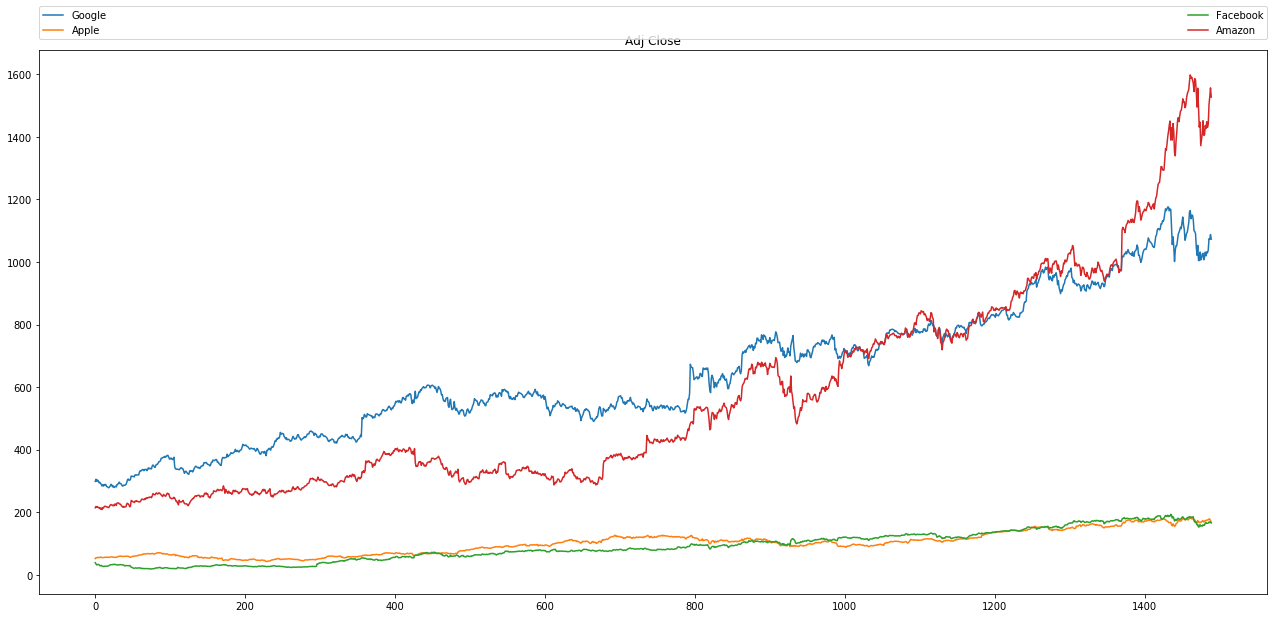

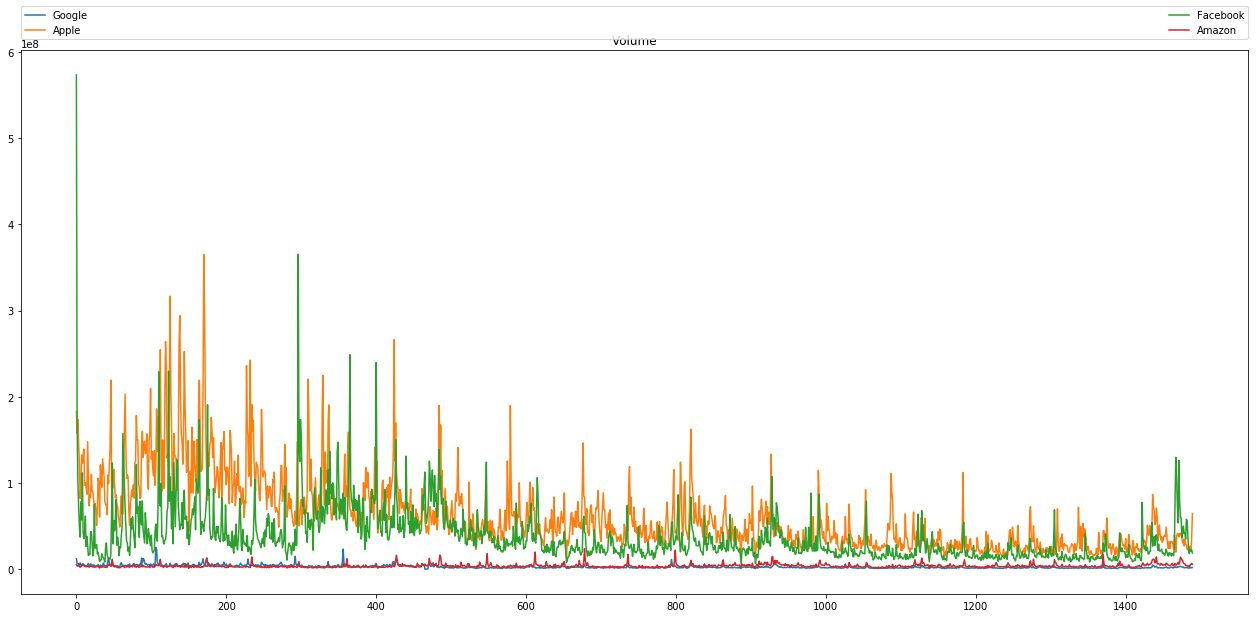

In [7]:
#Plotting line charts for each column for each stock individually to see the patterns it followed
def plot(p):
    plt.figure(figsize=(22,10))
    s1[p].plot(label="Google")
    s2[p].plot(label="Apple")
    s3[p].plot(label="Facebook")
    s4[p].plot(label="Amazon")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
    plt.title(p)
    plt.show()
plot('Open')
plot('High')
plot('Low')
plot('Close')
plot('Adj Close') #---->this is called a price chart
plot('Volume') 

In [8]:
#Concatenate all the different dataframes for each stock 
df1=pd.concat([s1,s2,s3,s4])

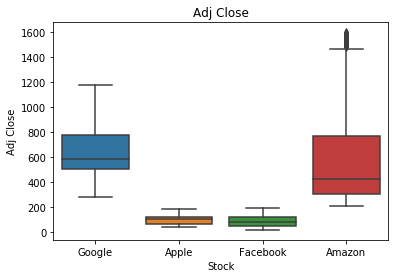

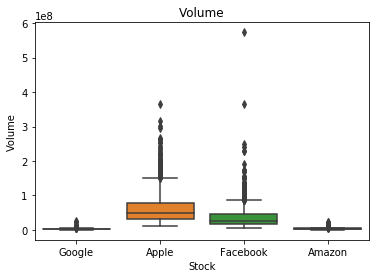

In [9]:
#Box plot of each of the stock show us the skewness in data along with the spread of values
#It marks min, max, median, upper quartile and lower quartile for each stock
def box(y1):
    sns.boxplot(x='Stock',y=y1,data=df1)
    plt.title(y1)
    plt.show()
box('Adj Close')
box('Volume')

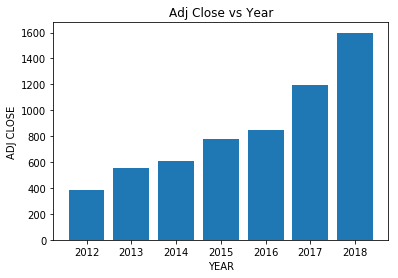

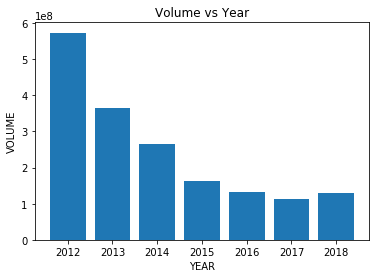

In [10]:
#Plots the cumulative bar graph for "Adj Close" for each year that shows that the stock prices increase every year
plt.bar(df1.Year,df1['Adj Close'])
plt.xlabel("YEAR")
plt.ylabel("ADJ CLOSE")
plt.title("Adj Close vs Year")
plt.show()

#Plots the cumulative bar graph for "Volume" that shows that as the stock prices increase every year the volume of stocks bought
#decreases.
plt.bar(df1.Year,df1.Volume)
plt.xlabel("YEAR")
plt.ylabel("VOLUME")
plt.title("Volume vs Year")
plt.show()

Text(0,0.5,'ADJ CLOSE')

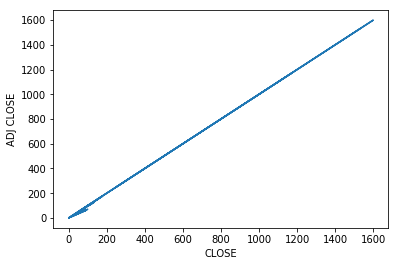

In [11]:
plt.plot(df.Close,df['Adj Close'])
plt.xlabel("CLOSE")
plt.ylabel("ADJ CLOSE")
#this means that no splitting (check the exact term) took place for these stocks

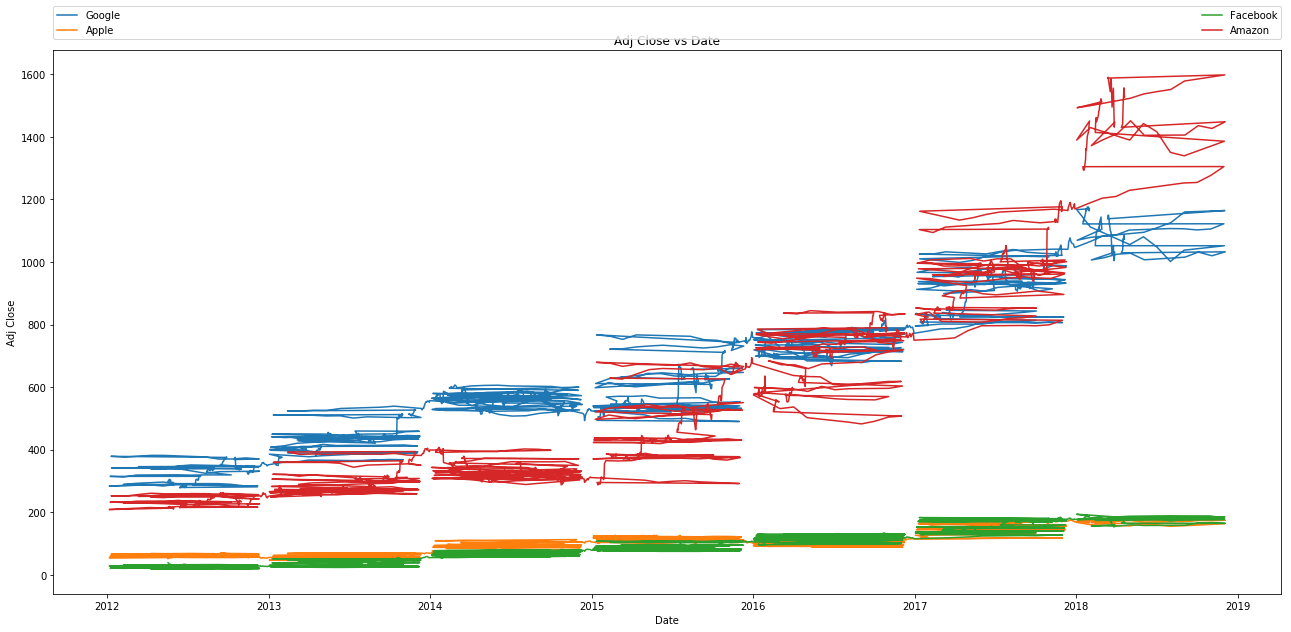

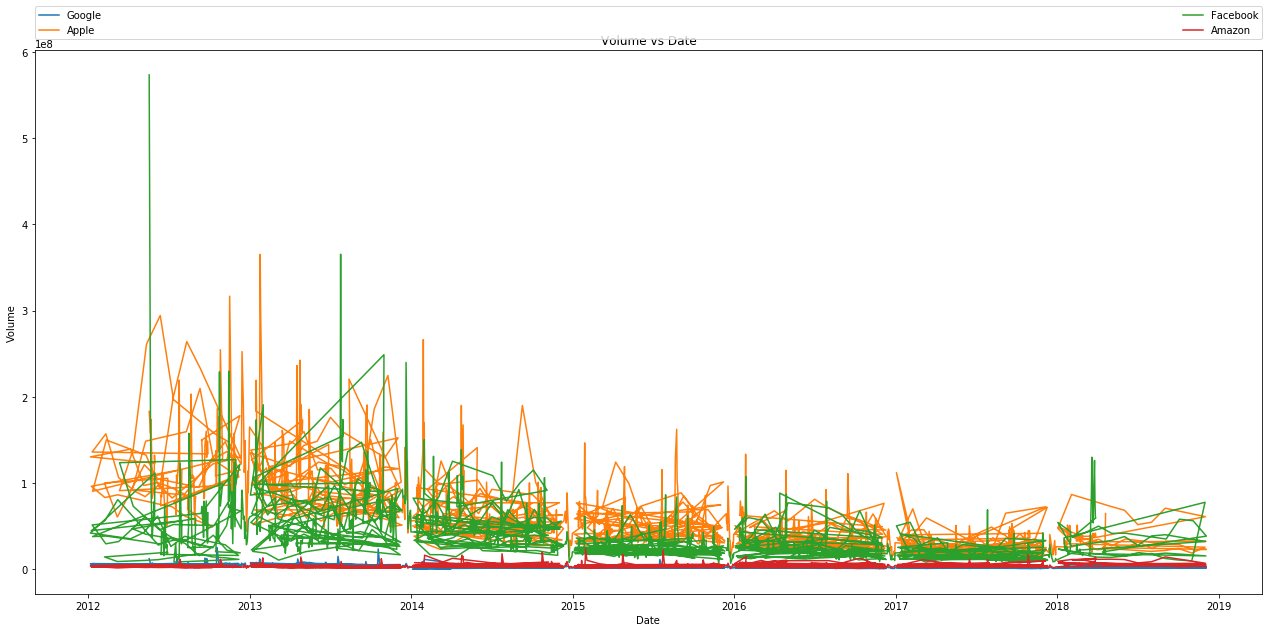

In [12]:
#Helps us analyse the values of the "Adj Close" and "Volume" with the "Date column"
#Shows us how the stock prices fluctuated along with the volume bought
def datevsp(p,q):
    plt.figure(figsize=(22,10))
    plt.plot(s1[p],s1[q],label="Google")
    plt.plot(s2[p],s2[q],label="Apple")
    plt.plot(s3[p],s3[q],label="Facebook")
    plt.plot(s4[p],s4[q],label="Amazon")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
    title=q+' vs '+p
    plt.title(title)
    plt.xlabel(p)
    plt.ylabel(q)
    plt.show()
datevsp('Date','Adj Close')
datevsp('Date','Volume')

<Figure size 1584x720 with 0 Axes>

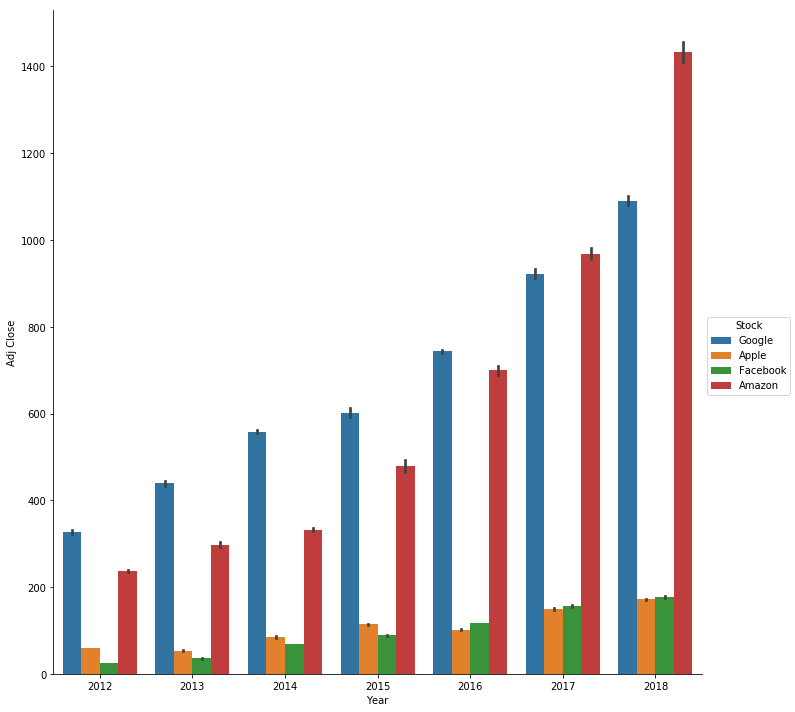

In [13]:
#Plots the "Adj Close" against the "Year" for each stock in the same graph to compare the values of "Adj Close" for each stock
plt.figure(figsize=(22,10))
sns.factorplot(x="Year",y='Adj Close',hue='Stock',data=df1,kind="bar",ci=95,size=10,aspect=1)
plt.show()

<Figure size 1584x720 with 0 Axes>

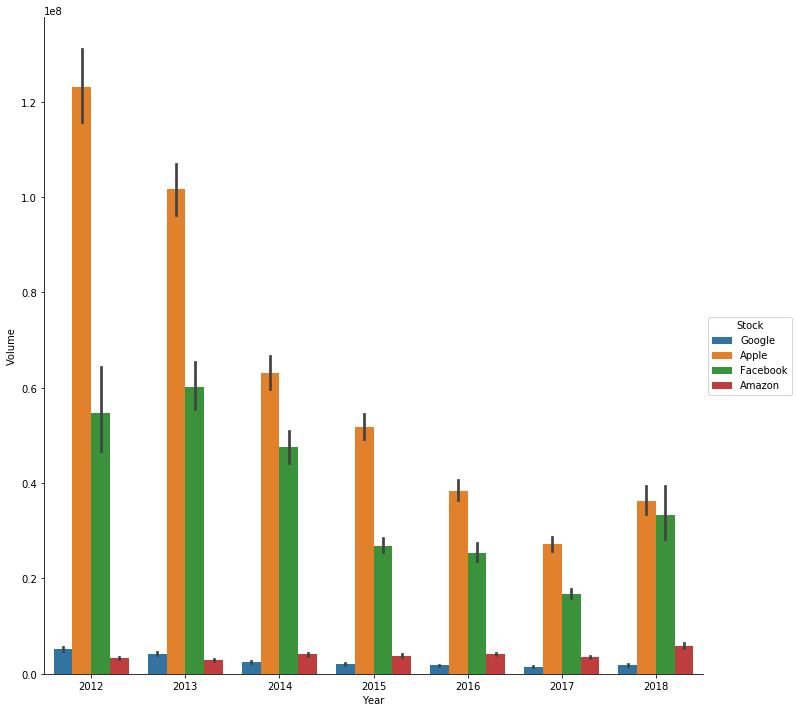

In [14]:
#Plots the "Volume" against the "Year" for each stock in the same graph to compare the values of "Volume" brought for each stock
plt.figure(figsize=(22,10))
sns.factorplot(x="Year",y='Volume',hue='Stock',data=df1,kind="bar",ci=95,size=10,aspect=1)
plt.show()

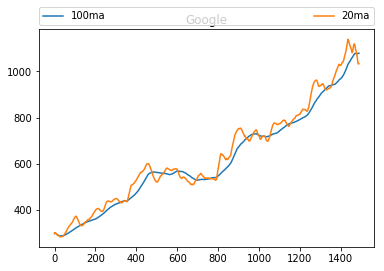

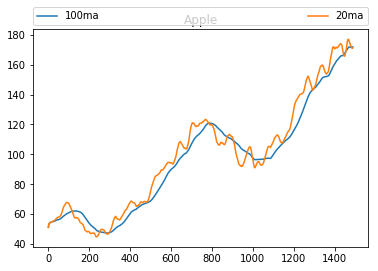

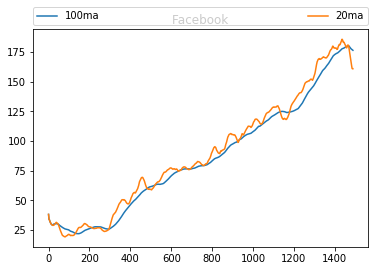

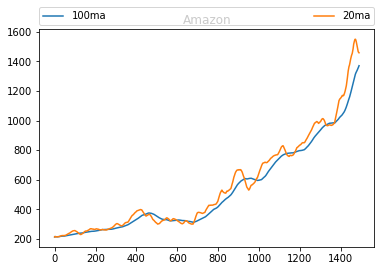

C:\Users\Atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



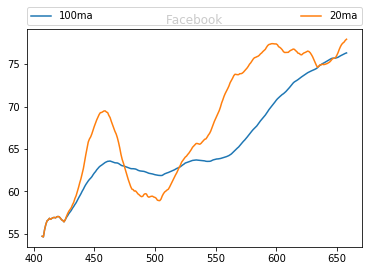

In [15]:
#Calculates the 100 days and 20 days moving average for each stock 
#MA reduces the noise and smoothens out the visual representation of the market 
#and helps us detect patterns that might otherwise go undetected.
#Plotting 100MA and 20MA against each other also helps us figure out when the stocks were overbought and oversold
def moving_avg(s,q):
    s['100ma']=s['Adj Close'].rolling(window=100,min_periods=0).mean()
    s['20ma']=s['Adj Close'].rolling(window=20,min_periods=0).mean()
    #plt.figure(figsize=(22,10))
    s['100ma'].plot(label="100ma")
    s['20ma'].plot(label="20ma")
    plt.title(q)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

moving_avg(s1,s1.Stock[0])
moving_avg(s2,s2.Stock[0])
moving_avg(s3,s3.Stock[0])
moving_avg(s4,s4.Stock[0])

#Gives us a better idea of overbought and oversold stocks
#20ma and 100ma plotted for the year 2014 for Facebook
moving_avg(s3[s3.Year==2014],s3.Stock[0])

In [16]:
#This function takes a data frame and makes two new data frames with it
#One data frame contains the open, high, low and close (ohlc) of the 10 days static average for the data frame passed
#The other data frame contains the static sum of 10 days of the volume for the data frame passed
#Then it plots this graph called candlestick_ohlc (which is a part of the module mpl_finance) for 2015 
#A candlestick basically contains the ohlc value on one single bar 
#The red bar implies that the stock closed at a lower price than it opened
#The green bar implies that the stock closed at a higher price than 
#Also plotted the sum of volume graph which is filled between with color
def candlestick(p):
    st="GAFA-"+p+".csv"
    k=pd.read_csv(st,parse_dates=True,index_col=3)
    df_ohlc=k["Adj Close"].resample('10D').ohlc()
    df_volume=k["Volume"].resample('10D').sum()
    df_volume.index
    df_ohlc.reset_index(inplace=True)
    df_ohlc["Year"]=[date.year for date in df_ohlc.Date]
    df_ohlc["Date"]=df_ohlc["Date"].map(mdates.date2num)
    plt.figure(figsize=(22,10))
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1, df_ohlc[df_ohlc.Year==2015].values, width=5, colorup='g')
    plt.title(p)
    plt.show()
    plt.figure(figsize=(22,10))
    plt.fill_between(df_volume.index, df_volume.values, 0)
    plt.title(p)
    plt.show()

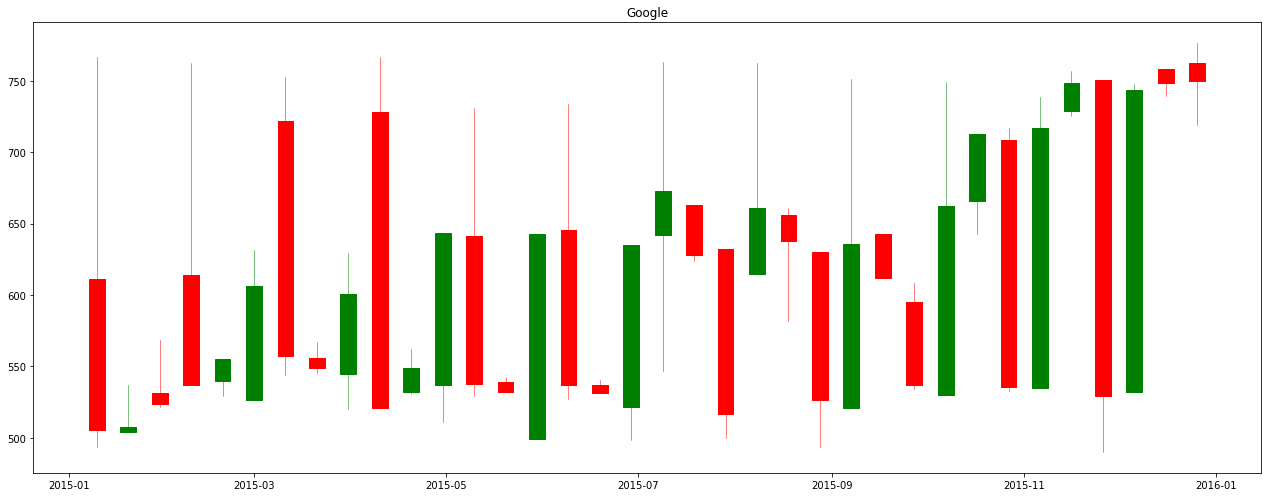

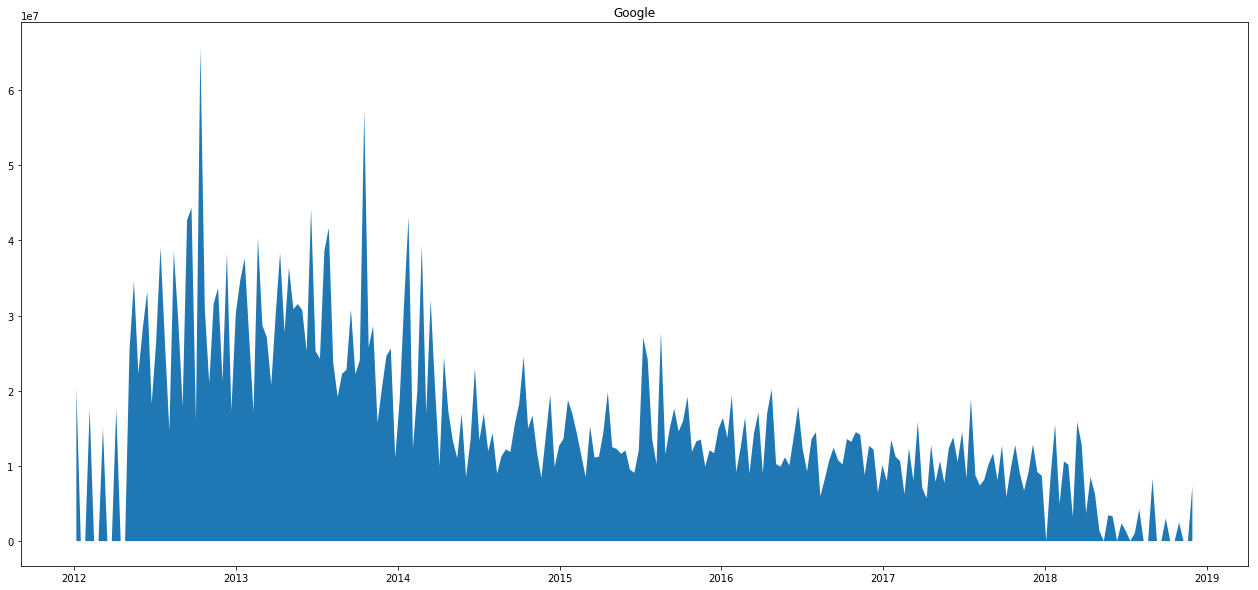

In [17]:
candlestick(s1.Stock[0])

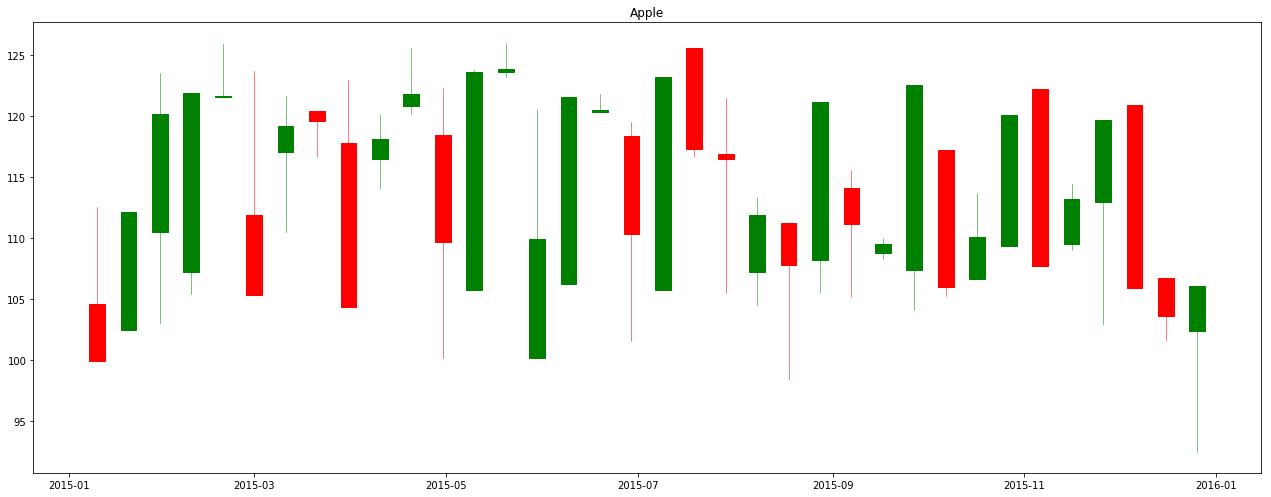

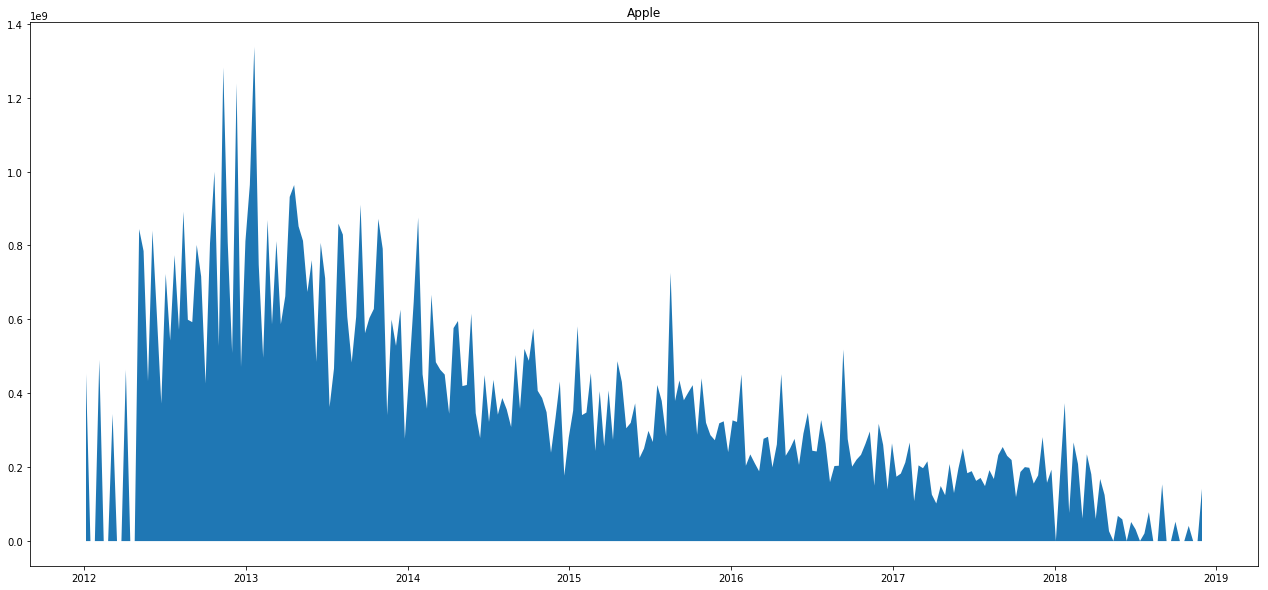

In [18]:
candlestick(s2.Stock[0])

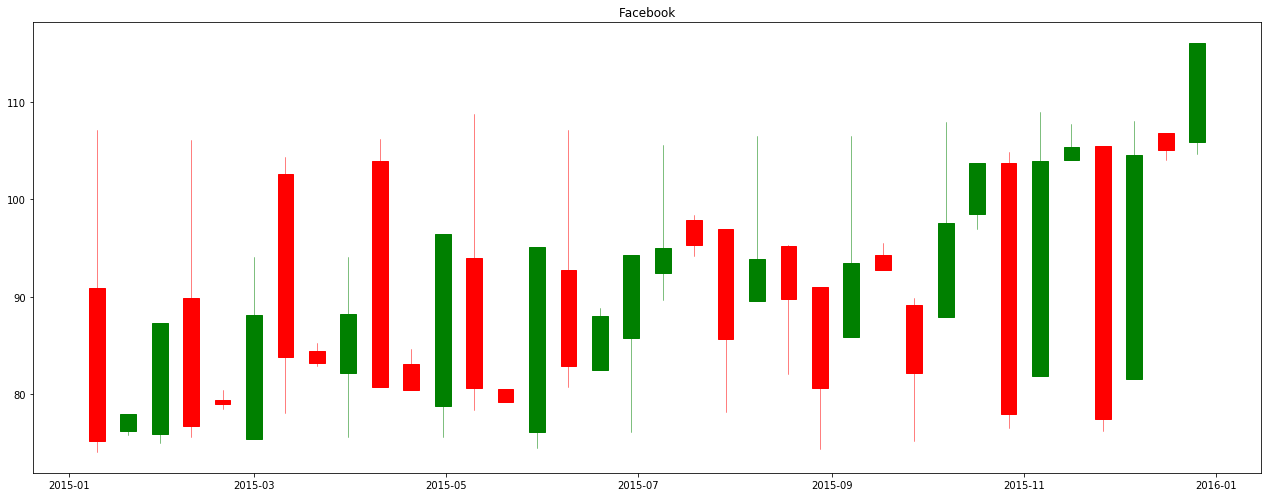

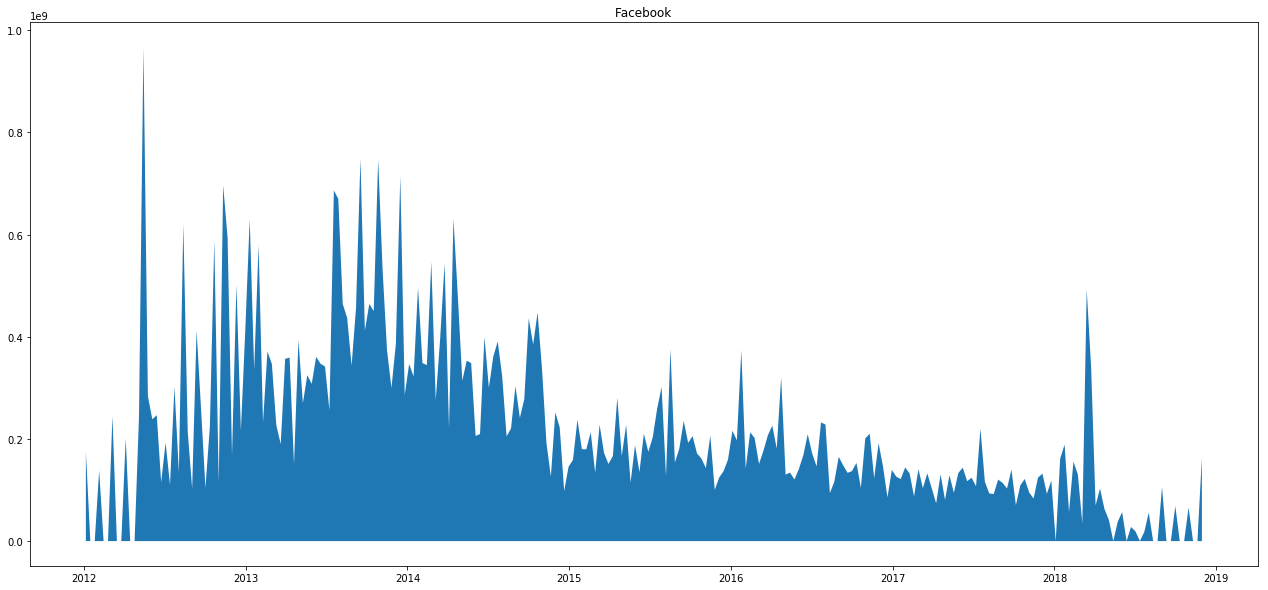

In [19]:
candlestick(s3.Stock[0])

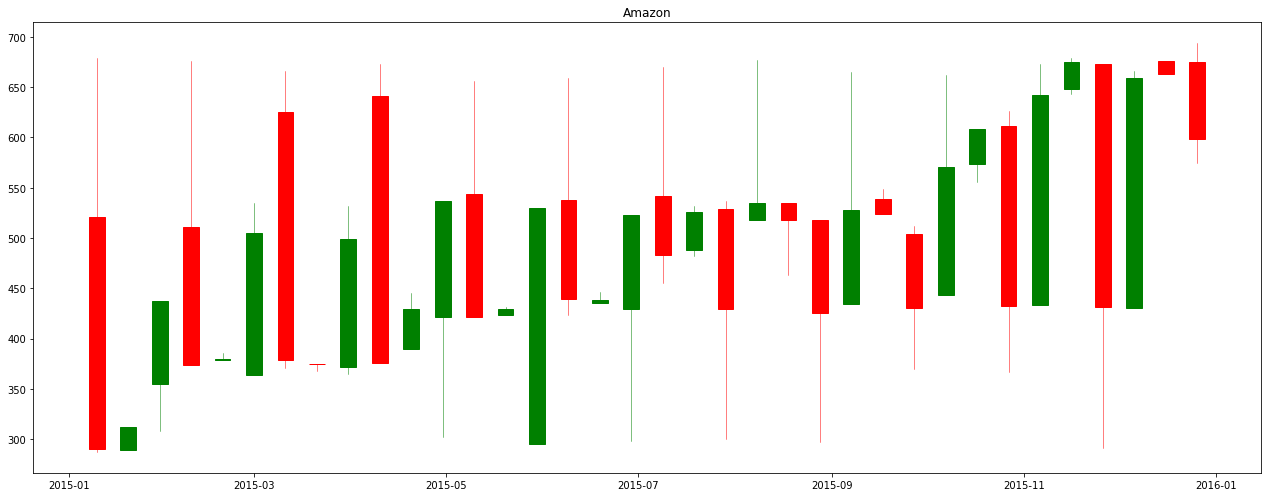

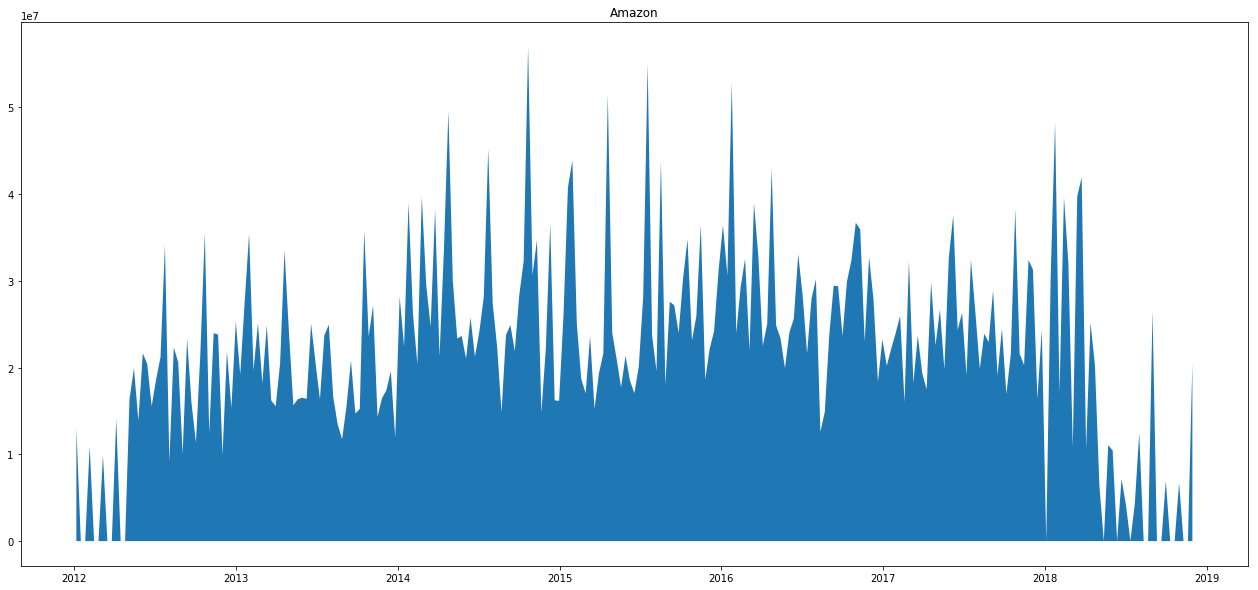

In [20]:
candlestick(s4.Stock[0])

In [21]:
df2=pd.DataFrame(columns=["Google","Apple","Facebook","Amazon"])
df2.head()

,Google,Apple,Facebook,Amazon


In [22]:
df2["Google"]=s1["Adj Close"]
df2["Apple"]=s2["Adj Close"]
df2["Facebook"]=s3["Adj Close"]
df2["Amazon"]=s4["Adj Close"]
#df2 contains the columns labelled by the stock name each containing the "Adj Close" of each stock

            Google     Apple  Facebook    Amazon
Google    1.000000  0.897827  0.975899  0.958161
Apple     0.897827  1.000000  0.933357  0.872446
Facebook  0.975899  0.933357  1.000000  0.935887
Amazon    0.958161  0.872446  0.935887  1.000000


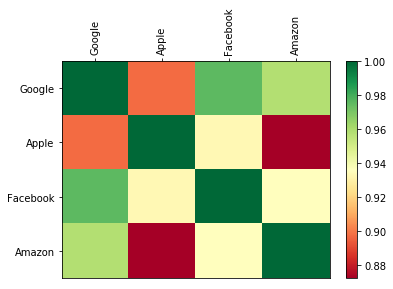

In [23]:
#This function plots a heatmap from the correlation between all the columns that contain the individual 'Adj Close' value for 
#each stock. 1 represents maximum correlation.
def heatmap():
    df_corr = df2.corr()
    print(df_corr)
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    plt.show()

heatmap()

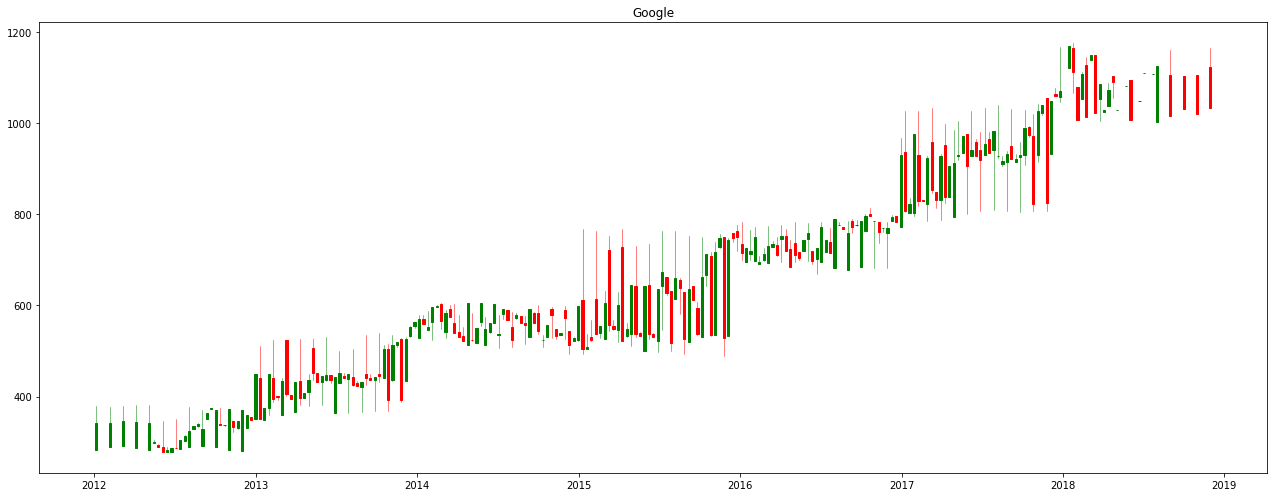

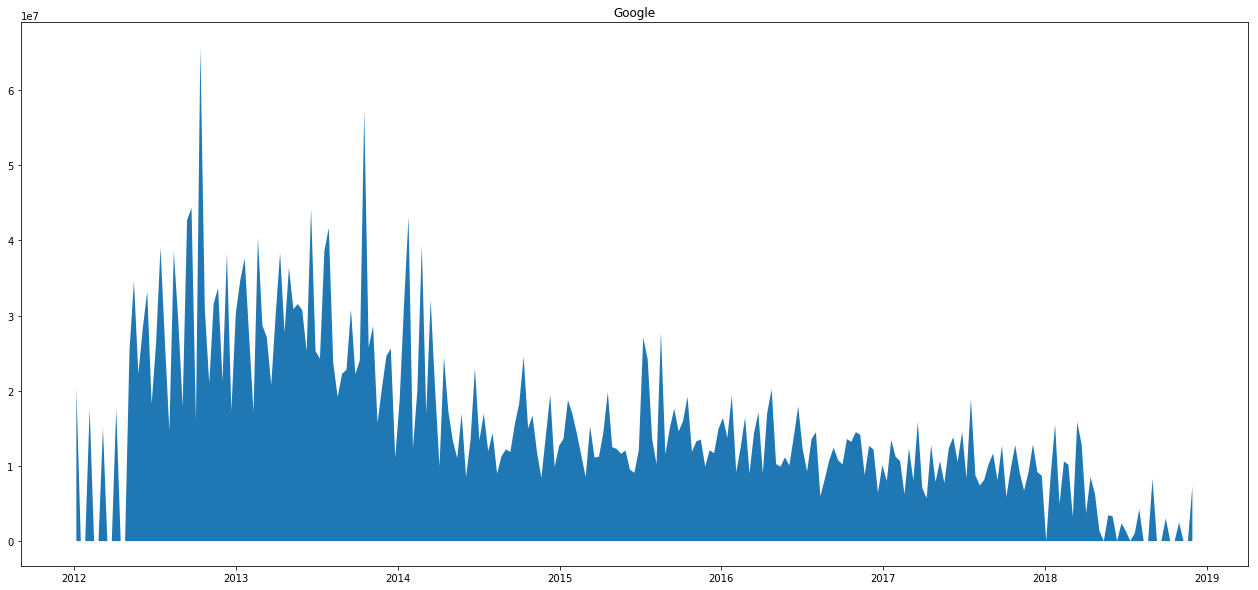

In [24]:
#Candlestick Analysis for Google over the period of 2012-2018
def candlestick1(p):
    st="GAFA-"+p+".csv"
    k=pd.read_csv(st,parse_dates=True,index_col=3)
    df_ohlc=k["Adj Close"].resample('10D').ohlc()
    df_volume=k["Volume"].resample('10D').sum()
    df_volume.index
    df_ohlc.reset_index(inplace=True)
    df_ohlc["Year"]=[date.year for date in df_ohlc.Date]
    df_ohlc["Date"]=df_ohlc["Date"].map(mdates.date2num)
    plt.figure(figsize=(22,10))
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
    plt.title(p)
    plt.show()
    plt.figure(figsize=(22,10))
    plt.fill_between(df_volume.index, df_volume.values, 0)
    plt.title(p)
    plt.show()
candlestick1(s1.Stock[0])